#### Tweedie GLM basics

[This](https://scikit-learn.org/stable/auto_examples/linear_model/plot_tweedie_regression_insurance_claims.html) link does an excellent job for going through a modelling case study using a Tweedie distribution and breaking into frequency and severity. 

In [1]:
from sklearn import linear_model
from numpy import log
import math

The most basic of linear models is the equation of a straight line:
$$y = mx + c$$
Extending this to a multivariate linear equation gives us something in the form of:
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n $$
One of the biggest assumptions of linear models is that the distribution that we are predicting is normally distributed. But what if it's not? Enter Generalized Linear Models (GLMs).

GLMs introduce link functions to model non-normal distributions. Poisson, Gamma and Tweedie distributions are part of the exponential family of distributions, therefore we might assume that to model these distributions with GLMs we should use the natural log on our target to shrink the distribution and not explode it with the exponent. 

In [2]:
log(0)

/var/folders/wd/qp852v8j47g6mk8gfmdtjktw0000gn/T/ipykernel_64527/4278842627.py:1: RuntimeWarning: divide by zero encountered in log
  log(0)


-inf

Woah, clearly not. 

Therefore let's rearrange things and instead of assuming:
$$\ln{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n $$
we instead have: 
$$ \hat{y} = g^{-1} \left( \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n \right )$$
The inverse of the natural log is the exponential. Therefore our link function and equation becomes:
$$ \hat{y} = \exp{ \left( \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n \right )} $$


In [3]:
from sklearn import linear_model
clf = linear_model.TweedieRegressor(power=1.5, link='log')
X = [[1, 2, 0], [2, 3, 0], [3, 4, 1], [4, 3, 0]]
y = [2, 3.5, 5, 5.5]

clf.fit(X, y)
clf.score(X, y)
print(clf.coef_)
print(clf.intercept_)

print(clf.predict([[1, 1, 1], [3, 4, 0]]))

[0.19851315 0.10786525 0.02603986]
0.509811558182181
[2.32153782 4.6497433 ]


Let's test to see if:
$$ \hat{y} = \exp{ \left( \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n \right )} $$

In [4]:
beta_1 = 3
beta_2 = 4
beta_3 = 0
rhs = math.exp(clf.intercept_ + clf.coef_[0] * beta_1 + clf.coef_[1] * beta_2 + clf.coef_[2] * beta_3)
lhs = clf.predict([[beta_1, beta_2, beta_3]])[0]

lhs == rhs

True

Now, using the rules of indices, we can split out our exponential to form:
$$ \hat{y} = \exp{ \beta_0 } \times \exp{ \beta_1 x_1 } \times \exp{ \beta_2 x_2 } \times \dots \times \exp{ \beta_n x_n }$$

In [5]:
rhs = math.exp(clf.intercept_) * \
    math.exp(clf.coef_[0] * beta_1) * \
    math.exp(clf.coef_[1] * beta_2) * \
    math.exp(clf.coef_[2] * beta_3)

lhs = clf.predict([[beta_1, beta_2, beta_3]])[0]

round(lhs, 10) == round(rhs, 10)

True

If we have a binary variable i.e. a 0 or 1 value that represents a characteristic e.g. "is this person a homeowner?" (1 being yes and 0 being no) then the $\beta$ value can be interpretted as a discount or surcharge depending if the $\beta < 0 $ or $ \beta > 0$. E.g. `coef_[2]` in the above will either be `coef_[2] * 1 = coef_[2]` or `coef_[2] * 0 = 0`, which will result in a multiplicative factor of $\exp{\left( \mathrm{coef}\_{[2]} \right) } = 1.026 $ (a 2.6% increase) or $\exp{0} = 1$ (no change). 

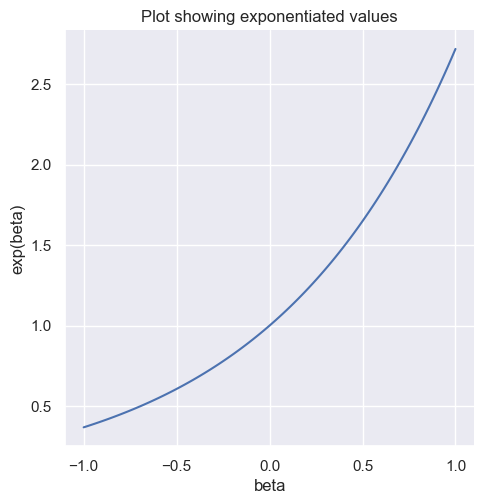

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme()

x = np.linspace(-1, 1, 100)
exp_data = pd.DataFrame({'x': x,
'y': np.exp(x)})

splt = sns.relplot(
    data=exp_data, kind="line",
    x="x", y="y"
)

splt.set(xlabel='beta', ylabel='exp(beta)', title='Plot showing exponentiated values')
plt.show()

TODO:
- weights
- offsets
- frequency
- severity